In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [76]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [77]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [78]:
# replace the spaces in the column labels with underscores to be able to reference columns with dot notation
df.columns = [label.replace(' ','_') for label in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


# Exploratory Analysis

In [79]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  good                  6497 non-null   int64  
 13  color                 6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [81]:
df.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

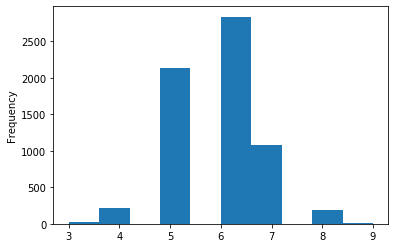

In [82]:
df['quality'].plot(kind='hist')

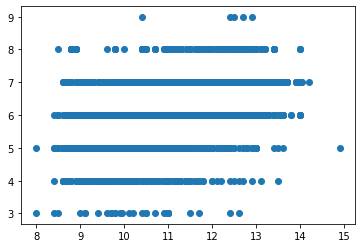

In [83]:
x = list(df['alcohol'])
y = list(df['quality'])
plt.scatter(x,y)

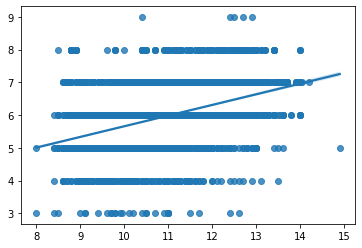

In [84]:
sns.regplot(x,y, data=df)

In [85]:
df1 = df[['chlorides','residual_sugar','quality','color']]
df1.head()

,chlorides,residual_sugar,quality,color
0,0.076,1.9,5,red
1,0.098,2.6,5,red
2,0.092,2.3,5,red
3,0.075,1.9,6,red
4,0.076,1.9,5,red


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


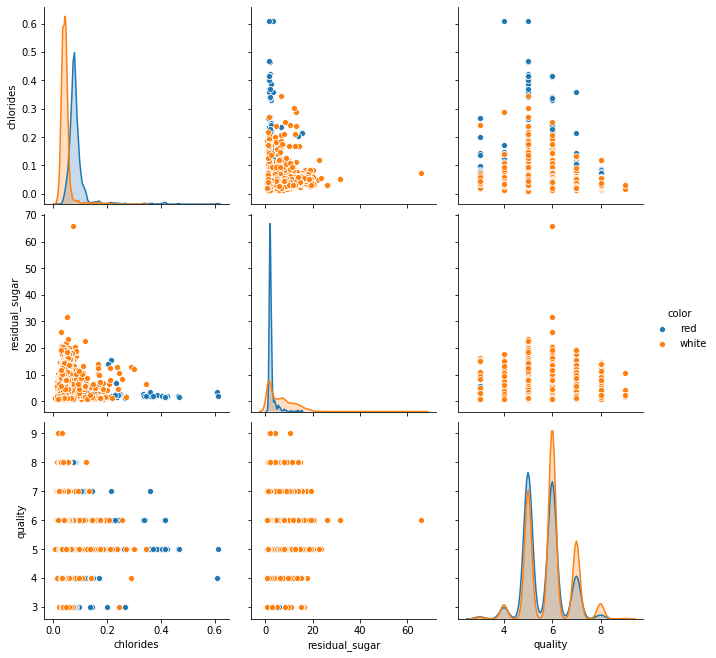

In [86]:
sns.pairplot(df1, hue='color', size=3);

## Extract the feature matrix and target array from the DataFrame

In [87]:
X = df1['residual_sugar']
X.head()

0    1.9
1    2.6
2    2.3
3    1.9
4    1.9
Name: residual_sugar, dtype: float64

In [88]:
y = df1['quality']

## Supervised learning example: Simple Linear Regression
* simple linear regression: the common case of fitting a line to (x, y) data.
* use numpy's simple data for regression example

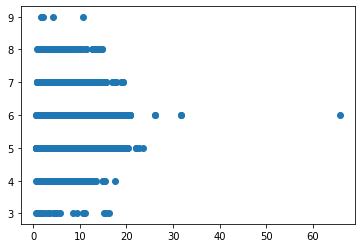

In [89]:
plt.scatter(X,y)

In [90]:
# Instanitiate LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]
print(X.shape)
print(y.shape)

(6497, 1)
(6497, 1)


In [93]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
model.coef_

array([[-0.00678746]])

In [95]:
model.intercept_

array([5.85532346])

In [96]:
# predit labels for unknown data. our "new data" will be a grid of x values
xfit = np.linspace(-1,11)
print(xfit.shape)
xfit

(50,)


array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [97]:
# reshape: we need to coerce these x values into a [n_samples, n_features] features matrix, then can feed it to the model
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
print(Xfit.shape)
Xfit

(50, 1)


array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

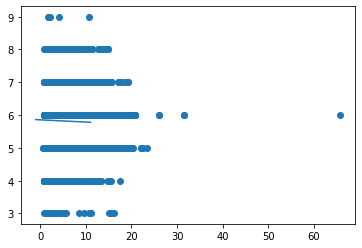

In [98]:
# A simple linear regression fit to the data
plt.scatter(X,y)
plt.plot(xfit, yfit);

# Supervised learning example: Classification
* use Gaussian naive Bayes as baseline model
    * fast, no hyperparamester to choose,
    * good model to be used as baseline - before explore whether improvements 
    * can be found thru more sophisticated models

In [99]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [100]:
# 1. choose model class
# 2. instantiate model
# 3. fit model to data
# 4. predict on new datas

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
# finally, use the accuracy_score utility to see the fraction of predicted labels that match their true value
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#accuracy is high, even this very naive classification algorithm is effective for this particular database!

0.44

### How different features of this dataset relate to the quality rating of the wine? 
* by observing the mean quality rating for the top and bottom half of each feature

In [12]:
def numeric_to_buckets(df, column_name):
    median = df[column_name].median()
    for i, val in enumerate(df[column_name]):
        if val >= median:
            df.loc[i, column_name] = 'high'
        else:
            df.loc[i, column_name] = 'low' 

In [13]:
# apply function for each feature/column name. Print with spaces between each feature
for feature in df.columns[:-1]:
    numeric_to_buckets(df, feature)
    print(df.groupby(feature).quality.mean(), '\n')

fixed_acidity
high    5.758840
low     5.880176
Name: quality, dtype: float64 

volatile_acidity
high    5.673162
low     5.976527
Name: quality, dtype: float64 

citric_acid
high    5.892975
low     5.739213
Name: quality, dtype: float64 

residual_sugar
high    5.827829
low     5.808801
Name: quality, dtype: float64 

chlorides
high    5.615976
low     6.037857
Name: quality, dtype: float64 

free_sulfur_dioxide
high    5.917275
low     5.717046
Name: quality, dtype: float64 

total_sulfur_dioxide
high    5.792694
low     5.844645
Name: quality, dtype: float64 

density
high    5.588000
low     6.048968
Name: quality, dtype: float64 

pH
high    5.852464
low     5.783901
Name: quality, dtype: float64 



KeyboardInterrupt: 

In [ ]:
df.quality

In [14]:
import numpy as np

In [15]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good,color
0,high,high,low,low,high,low,low,high,high,high,9.4,5,0,red
1,high,high,low,low,high,low,low,high,low,high,9.8,5,0,red
2,high,high,low,low,high,low,low,high,high,high,9.8,5,0,red
3,high,low,high,low,high,low,low,high,low,high,9.8,6,0,red
4,high,high,low,low,high,low,low,high,high,high,9.4,5,0,red
